### 1.	The quarterly gross domestic product series shown below has which components of a time series?

In [ ]:
#  the given graph has trend and seasonality 

### 2.	If a quarterly time series has additive seasonality, then find out the missing value

In [ ]:
# "ans is -1" since time series data, seasonality is the presence of variations that occur at specific regular intervals less than a year,
#such as weekly, monthly, or quarterly.

In [27]:
#imports
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure

In [ ]:
## reading the dataframe

In [2]:
df=pd.read_csv("AusWineSales.csv")

In [3]:
df.head()

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91


In [131]:
df.shape

(187, 6)

In [4]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(df))

In [6]:
import calendar
df['Month'] = dates.month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Year'] = dates.year

In [8]:
df.head()

,YearMonth,Red,Sparkling,Sweetwhite,Month,Year
0,1980-01,464,1686,85,Jan,1980
1,1980-02,675,1591,89,Feb,1980
2,1980-03,703,2304,109,Mar,1980
3,1980-04,887,1712,95,Apr,1980
4,1980-05,1139,1471,91,May,1980


In [11]:
df.set_index(dates, inplace=True)

### Red wine sales

In [12]:
df1 = df[['Month', 'Year', 'Red']]

In [18]:
df1.head()
#df1.tail()

,Month,Year,Red
1980-01-01,Jan,1980,464
1980-02-01,Feb,1980,675
1980-03-01,Mar,1980,703
1980-04-01,Apr,1980,887
1980-05-01,May,1980,1139


### sparkling sales

In [22]:
df2 = df[['Month', 'Year', 'Sparkling']]

In [23]:
df2.head()

,Month,Year,Sparkling
1980-01-01,Jan,1980,1686
1980-02-01,Feb,1980,1591
1980-03-01,Mar,1980,2304
1980-04-01,Apr,1980,1712
1980-05-01,May,1980,1471


### Sweetwhite sales

In [24]:
df3 = df[['Month', 'Year', 'Sweetwhite']]

In [25]:
df3.head()

,Month,Year,Sweetwhite
1980-01-01,Jan,1980,85
1980-02-01,Feb,1980,89
1980-03-01,Mar,1980,109
1980-04-01,Apr,1980,95
1980-05-01,May,1980,91


In [108]:
# extract out the time-series
sales_red = df1['Red']

Text(0,0.5,'red wine sales')

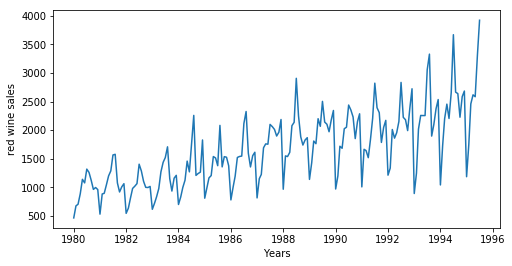

In [109]:
plt.figure(figsize=(8, 4))
plt.plot(sales_red)
plt.xlabel('Years')
plt.ylabel('red wine sales')

In [34]:
# extract out the time-series
sales_sp = df2['Sparkling']

Text(0,0.5,'sparkling sales')

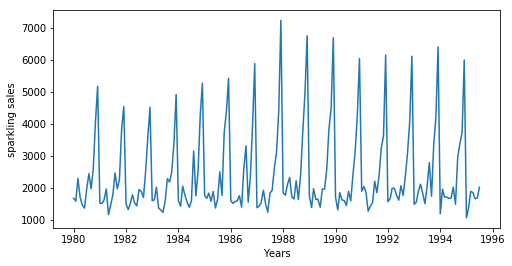

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(sales_sp)
plt.xlabel('Years')
plt.ylabel('sparkling sales')

In [36]:
# extract out the time-series
sales_sweetwhite = df3['Sweetwhite']

Text(0,0.5,'sweetwhite sales')

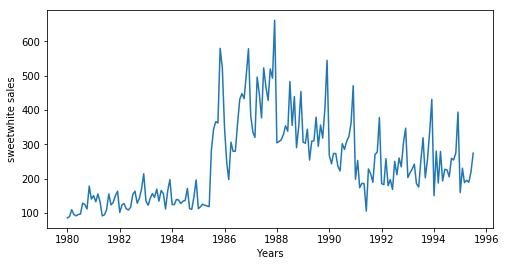

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(sales_sweetwhite)
plt.xlabel('Years')
plt.ylabel('sweetwhite sales')

In [ ]:
# seasonal decomposition for red wine

In [39]:
import statsmodels.api as sm

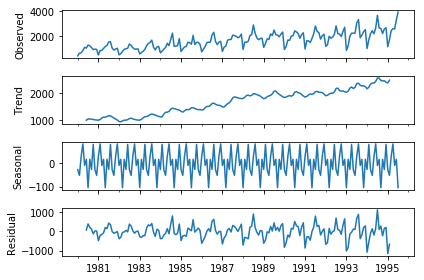

In [41]:
decompTurnover = sm.tsa.seasonal_decompose(df1.Red, model="additive", freq=10)
decompTurnover.plot()
plt.show()

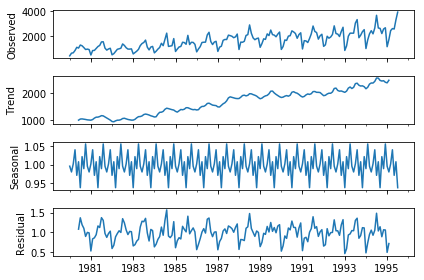

In [45]:
decompTurnover = sm.tsa.seasonal_decompose(df1.Red, model="multiplicative", freq=10)
decompTurnover.plot()
plt.show()

#### b.Smooth the series of sweet white sales with an appropriate moving average. Plot both the original and moving average on the same graph, preferably using different colors

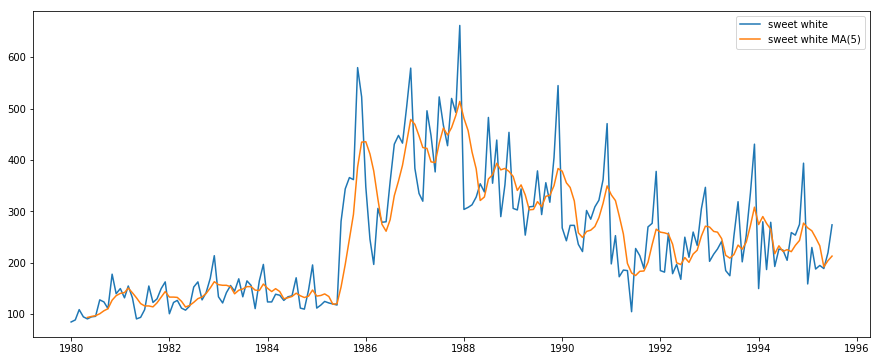

In [54]:
mvg_avg= df3.copy()
plt.figure(figsize=(15, 6))
mvg_avg['moving_avg_forecast'] = df3['Sweetwhite'].rolling(5).mean()
plt.plot(df3['Sweetwhite'], label='sweet white')
plt.plot(mvg_avg['moving_avg_forecast'], label='sweet white MA(5)')
plt.legend(loc='best')

In [72]:
mvg_avg1 = df3.copy()
mvg_avg2 = df3.copy()
mvg_avg3 = df3.copy()

mvg_avg1['moving_avg_forecast'] = df3['Sweetwhite'].rolling(10).mean()
mvg_avg2['moving_avg_forecast'] = df3['Sweetwhite'].rolling(15).mean()
mvg_avg3['moving_avg_forecast'] = df3['Sweetwhite'].rolling(20).mean()

mvg_avg1.head()

,Month,Year,Sweetwhite,moving_avg_forecast
1980-01-01,Jan,1980,85,NaN
1980-02-01,Feb,1980,89,NaN
1980-03-01,Mar,1980,109,NaN
1980-04-01,Apr,1980,95,NaN
1980-05-01,May,1980,91,NaN


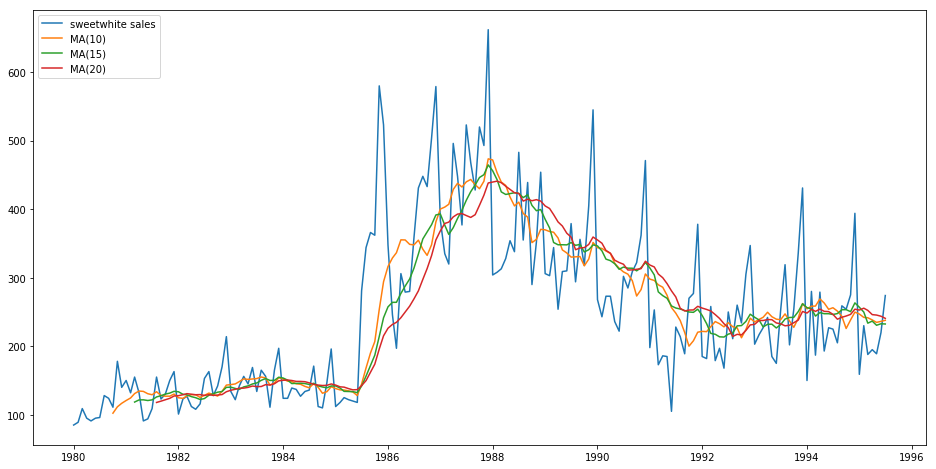

In [73]:
plt.figure(figsize=(16,8))
plt.plot(df3['Sweetwhite'], label='sweetwhite sales')
plt.plot(mvg_avg1['moving_avg_forecast'], label='MA(10)')
plt.plot(mvg_avg2['moving_avg_forecast'], label='MA(15)')
plt.plot(mvg_avg3['moving_avg_forecast'], label='MA(20)')
plt.legend(loc='upper left')

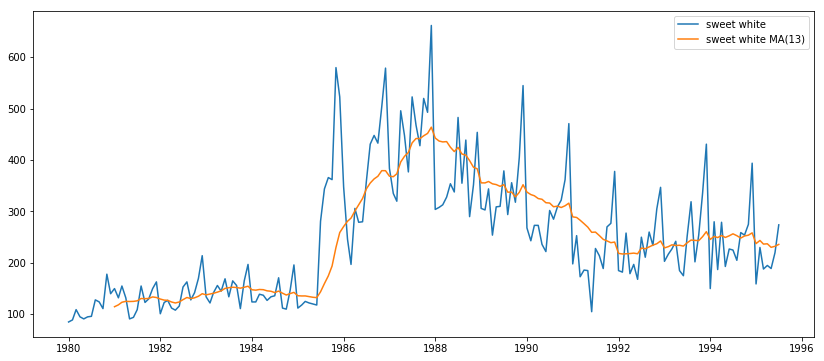

In [94]:
#the optimum moving avg of sweetwhite sales
mvg_avg= df3.copy()
plt.figure(figsize=(14,6))
mvg_avg['moving_avg_forecast'] = df3['Sweetwhite'].rolling(13).mean()
plt.plot(df3['Sweetwhite'], label='sweet white')
plt.plot(mvg_avg['moving_avg_forecast'], label='sweet white MA(13)')
plt.legend(loc='best')

#### c.Do month plot on both sparkling and red wine series. Which is the main difference noted between the two series?

In [ ]:
### mothly sales for sparkling wine

In [84]:
monthly_sales_s = pd.pivot_table(df2, values = "Sparkling", columns = "Month", index = "Year")
monthly_sales_s = monthly_sales[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_sales_s

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


<Figure size 720x432 with 0 Axes>

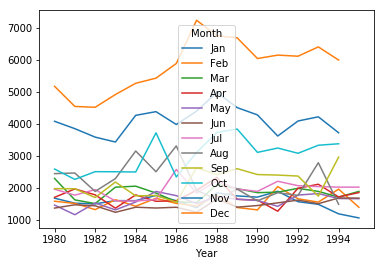

In [85]:
plt.figure(figsize=(10, 6))
monthly_sales_s.plot()


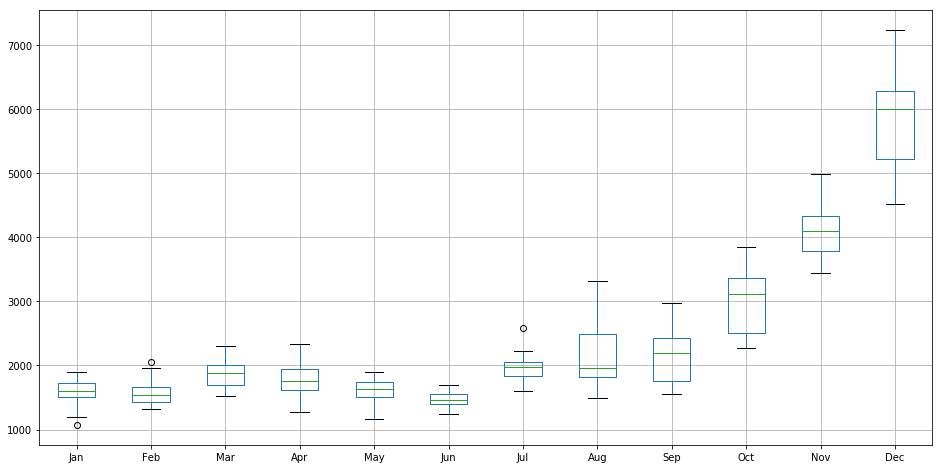

In [86]:
plt.figure(figsize=(16,8))
monthly_sales_s.boxplot()

Text(0,0.5,'sparkling sales')

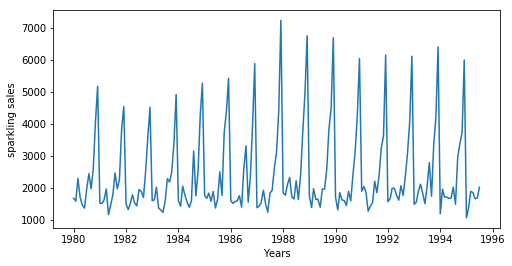

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(sales_sp)
plt.xlabel('Years')
plt.ylabel('sparkling sales')

In [ ]:
### mothly sales for red wine

In [87]:
monthly_sales_red = pd.pivot_table(df1, values = "Red", columns = "Month", index = "Year")
monthly_sales_red = monthly_sales_red[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_sales_red

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,464.0,675.0,703.0,887.0,1139.0,1077.0,1318.0,1260.0,1120.0,963.0,996.0,960.0
1981,530.0,883.0,894.0,1045.0,1199.0,1287.0,1565.0,1577.0,1076.0,918.0,1008.0,1063.0
1982,544.0,635.0,804.0,980.0,1018.0,1064.0,1404.0,1286.0,1104.0,999.0,996.0,1015.0
1983,615.0,722.0,832.0,977.0,1270.0,1437.0,1520.0,1708.0,1151.0,934.0,1159.0,1209.0
1984,699.0,830.0,996.0,1124.0,1458.0,1270.0,1753.0,2258.0,1208.0,1241.0,1265.0,1828.0
1985,809.0,997.0,1164.0,1205.0,1538.0,1513.0,1378.0,2083.0,1357.0,1536.0,1526.0,1376.0
1986,779.0,1005.0,1193.0,1522.0,1539.0,1546.0,2116.0,2326.0,1596.0,1356.0,1553.0,1613.0
1987,814.0,1150.0,1225.0,1691.0,1759.0,1754.0,2100.0,2062.0,2012.0,1897.0,1964.0,2186.0
1988,966.0,1549.0,1538.0,1612.0,2078.0,2137.0,2907.0,2249.0,1883.0,1739.0,1828.0,1868.0


<Figure size 720x432 with 0 Axes>

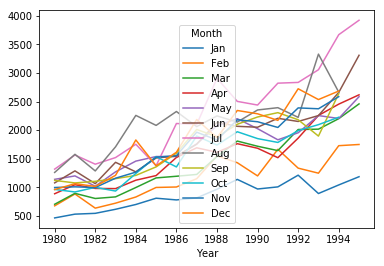

In [88]:
plt.figure(figsize=(10, 6))
monthly_sales_red.plot()

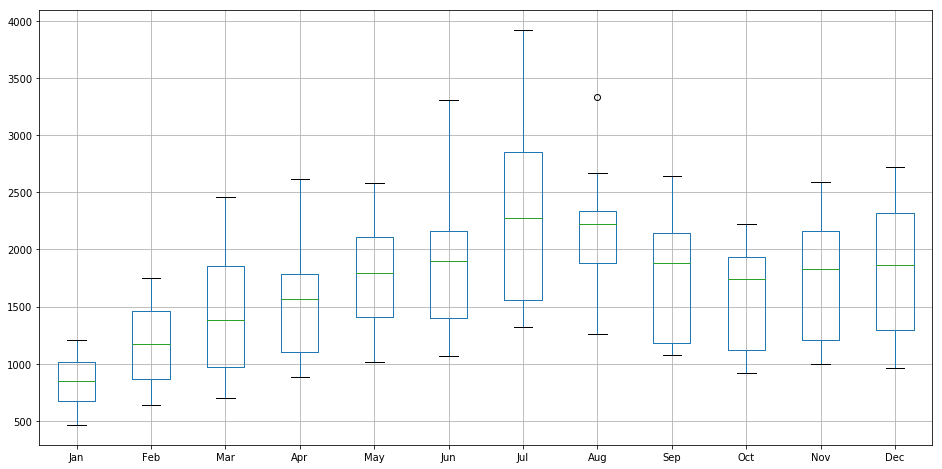

In [89]:
plt.figure(figsize=(16,8))
monthly_sales_red.boxplot()

In [ ]:
#from the time series of red wine and sparkling 

In [ ]:
#Sparkling wine has no trend where as red wine sales as a trend wrt year 
#both of them having seasonality but sparkling have higher seasonality the red wne has.
#as the month passes ,the variation is constant untill september,and after september the variation is very high.
#in red wine time series sales,i can see no varition of sales across months but across years it has trend.
#in december ,sparkling wine has huge sales then any other months.
# as the year passes ,the sales of red wine are increasing over months.


#### d.	Extract seasonality for both series. Argue which seasonality (additive or multiplicative) will be appropriate for which series. Plot only the seasonality.

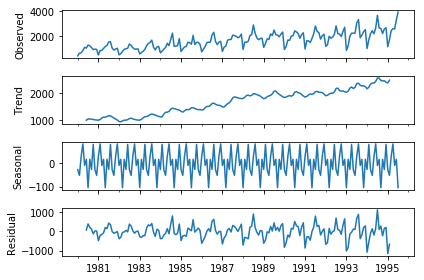

In [104]:
#seasonality for red wine
decompTurnover = sm.tsa.seasonal_decompose(df1.Red, model="additive", freq=10)
decompTurnover.plot()
plt.show()

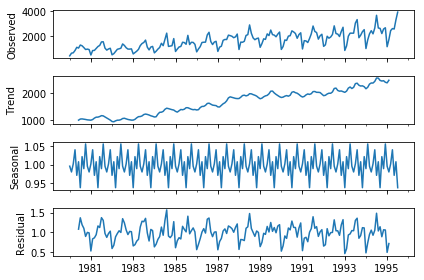

In [105]:
decompTurnover = sm.tsa.seasonal_decompose(df1.Red, model="multiplicative", freq=10)
decompTurnover.plot()
plt.show()

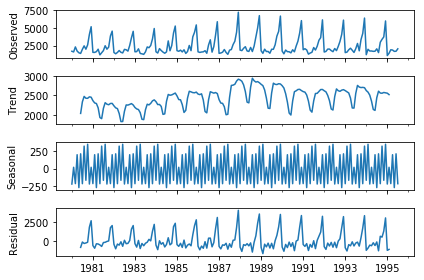

In [98]:
#seasonality for sparkling wine
decompTurnover = sm.tsa.seasonal_decompose(df2.Sparkling, model="additive", freq=10)
decompTurnover.plot()
plt.show()

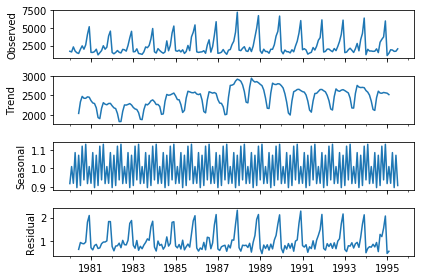

In [99]:
decompTurnover = sm.tsa.seasonal_decompose(df2.Sparkling, model="multiplicative", freq=10)
decompTurnover.plot()
plt.show()

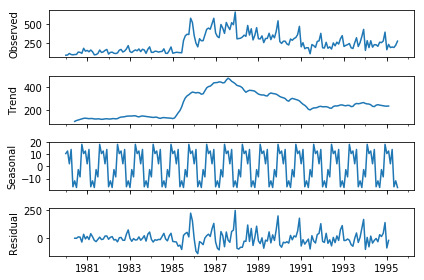

In [100]:
decompTurnover = sm.tsa.seasonal_decompose(df3.Sweetwhite, model="additive", freq=10)
decompTurnover.plot()
plt.show()

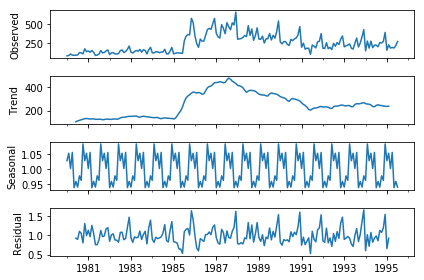

In [101]:
decompTurnover = sm.tsa.seasonal_decompose(df3.Sweetwhite, model="multiplicative", freq=10)
decompTurnover.plot()
plt.show()

## Red wine time series

<Figure size 720x432 with 0 Axes>

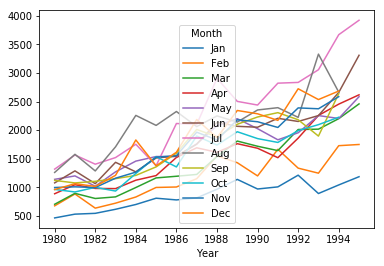

In [116]:
plt.figure(figsize=(10, 6))
monthly_sales_red.plot()


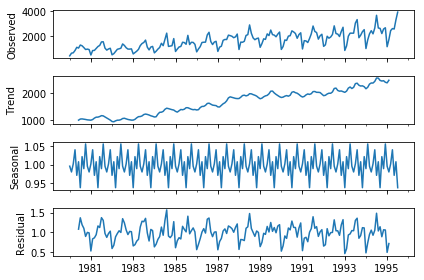

In [106]:
## since the trend in the red wine sales are increasing,multiplicative model is used.
decompTurnover = sm.tsa.seasonal_decompose(df1.Red, model="multiplicative", freq=10)
decompTurnover.plot()
plt.show()

## Saprkling wine timeseries

<Figure size 720x432 with 0 Axes>

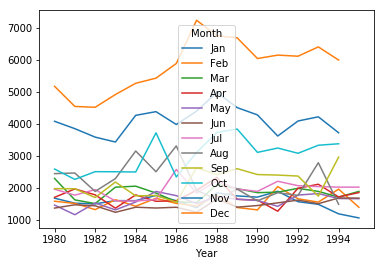

In [115]:
plt.figure(figsize=(10, 6))
monthly_sales_s.plot()

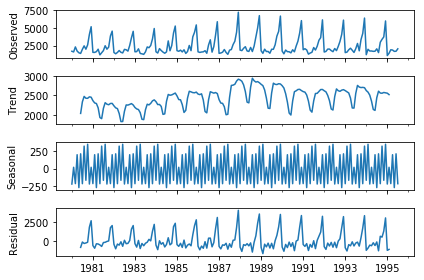

In [112]:
## since seasonality is parallel and no trend ,additive is taken
decompTurnover = sm.tsa.seasonal_decompose(df2.Sparkling, model="additive", freq=10)
decompTurnover.plot()
plt.show()

## Sweetwhite timeseries

In [117]:
monthly_sales_sweet = pd.pivot_table(df3, values = "Sweetwhite", columns = "Month", index = "Year")
monthly_sales_sweet = monthly_sales_red[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_sales_sweet

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,464.0,675.0,703.0,887.0,1139.0,1077.0,1318.0,1260.0,1120.0,963.0,996.0,960.0
1981,530.0,883.0,894.0,1045.0,1199.0,1287.0,1565.0,1577.0,1076.0,918.0,1008.0,1063.0
1982,544.0,635.0,804.0,980.0,1018.0,1064.0,1404.0,1286.0,1104.0,999.0,996.0,1015.0
1983,615.0,722.0,832.0,977.0,1270.0,1437.0,1520.0,1708.0,1151.0,934.0,1159.0,1209.0
1984,699.0,830.0,996.0,1124.0,1458.0,1270.0,1753.0,2258.0,1208.0,1241.0,1265.0,1828.0
1985,809.0,997.0,1164.0,1205.0,1538.0,1513.0,1378.0,2083.0,1357.0,1536.0,1526.0,1376.0
1986,779.0,1005.0,1193.0,1522.0,1539.0,1546.0,2116.0,2326.0,1596.0,1356.0,1553.0,1613.0
1987,814.0,1150.0,1225.0,1691.0,1759.0,1754.0,2100.0,2062.0,2012.0,1897.0,1964.0,2186.0
1988,966.0,1549.0,1538.0,1612.0,2078.0,2137.0,2907.0,2249.0,1883.0,1739.0,1828.0,1868.0


<Figure size 720x432 with 0 Axes>

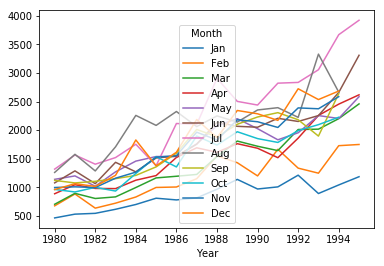

In [118]:
plt.figure(figsize=(10, 6))
monthly_sales_sweet.plot()

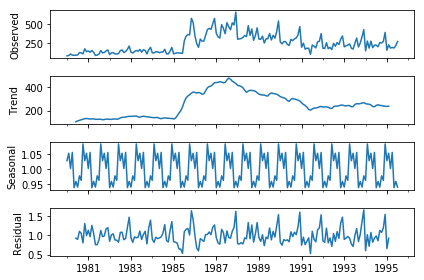

In [119]:
## since their is a trend in sweetwhite wine and  diverging,multiplicative model is used.
decompTurnover = sm.tsa.seasonal_decompose(df3.Sweetwhite, model="multiplicative", freq=10)
decompTurnover.plot()
plt.show()

### e.	Forecast for sparkling wine sales for next 12 months. Explain the model and write down the model parameters.

## Decomposition approach

In [133]:
train=df2[0:175] 
test=df2[175:]

In [120]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [156]:
model_fit=ExponentialSmoothing(np.asarray(train['Sparkling']), seasonal_periods=12 ,seasonal='add').fit(optimized=True)

In [195]:
model_fit.forecast(12)

# Compute the root mean square error
mse = ((testCopy['Sparkling'] - pred) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 391.828


In [194]:
pred=model_fit.forecast(12)


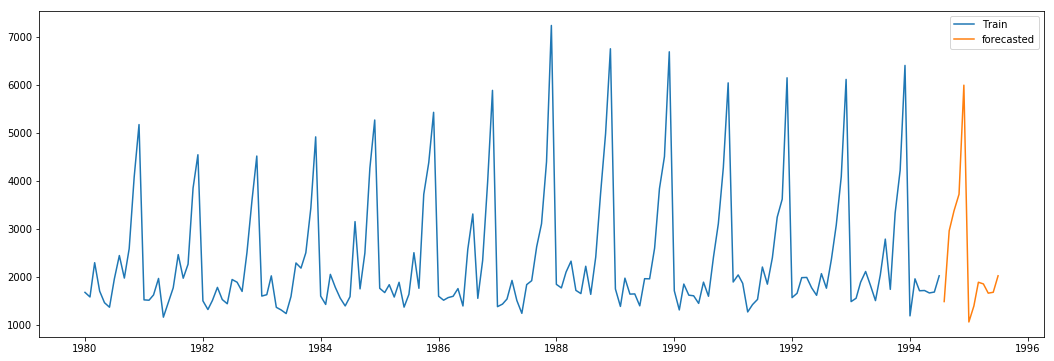

In [163]:
fcst = test.copy()
fcst['Sparklings'] = model_fit.forecast(len(test['Sparkling']))
plt.figure(figsize=(18,6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(fcst['Sparkling'], label='forecasted')
plt.legend(loc='best')

## Regression approach

In [170]:
## regression method
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")



import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sales=df2.Sparkling

In [177]:
sales_ts_log = np.log10(sales)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

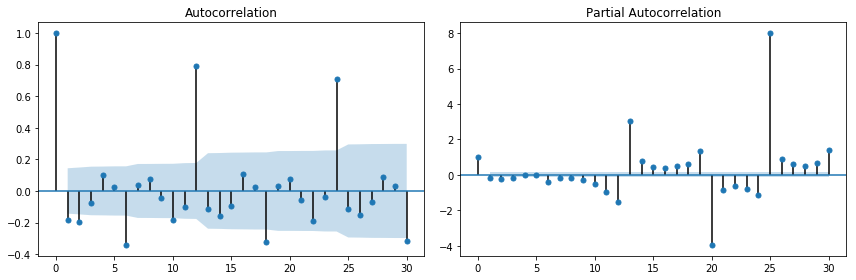

In [178]:
#since it is in stationary no need of making into stationarize
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [171]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [172]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [179]:
train_sales=np.log10(train.Sparkling)

In [180]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_sales,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 model - AIC:-412.7080376594021


In [193]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

##### The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

Akaike Information Criterion (AIC) - AIC is an effort to balance the model between goodness-of-fit and number of parameters used in the model. This is similar to the balancing act between income and cost of a company so that the debs of the company is optimized (Debt = Cost - Income). As a modeler, we care about the maximum goodness of fit (income) with the minimum number of parameters (cost).

AIC=2K−2ln(L)

For the given model, L in the above formula is the maximized value of the likelihood function representing goodness-of-fit, and K the number of estimated parameters. Like our debts, we want to keep AIC value at the minimum to choose the best possible model. Bayesian Information Criterion (BIC) is another variant of AIC and is used for the same purpose of best fit model selection. For the best possible model selection, we want to look at AIC, BIC, and AICc (AIC with sample correction) if all these values are minimum for a given model. With increasing parameters K will increase and hence AIC increases. While with the goodness of the fit L increases thus decreasing AIC.

As expected, our model has I (or integrated) component equal to 1. This represents differencing of order 1. There is additional differencing of lag 12 in the above best fit model. Moreover, the best fit model has MA value of order 1. Also, there is seasonal MA with lag 12 of order 1.

The model that we got here is different from the one that was discussed in the blog. Let us validate that model with ours how does that perform with statsmodel as well as our model.

In [181]:
best_model = sm.tsa.statespace.SARIMAX(train_sales,
                                      order=(0, 0, 0),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [182]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                            Statespace Model Results                            
Dep. Variable:                Sparkling   No. Observations:                  175
Model:             SARIMAX(1, 1, 1, 12)   Log Likelihood                 209.354
Date:                  Fri, 28 Dec 2018   AIC                           -412.708
Time:                          12:58:00   BIC                           -403.427
Sample:                      01-01-1980   HQIC                          -408.940
                           - 07-01-1994                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2273      0.120      1.892      0.058      -0.008       0.463
ma.S.L12      -0.8257      0.109     -7.577      0.000      -1.039      -0.612
sigma2         0.0042      0.001    

In [183]:
pred = best_results.forecast(steps=12, alpha=0.1)

In [184]:
pred

1994-08-01    3.359811
1994-09-01    3.307208
1994-10-01    3.503299
1994-11-01    3.620395
1994-12-01    3.789347
1995-01-01    3.160498
1995-02-01    3.238269
1995-03-01    3.259350
1995-04-01    3.244928
1995-05-01    3.218510
1995-06-01    3.193478
1995-07-01    3.304566
Freq: MS, dtype: float64

In [187]:
testCopy = test.copy()
testCopy['pred_sparkling'] = np.power(10, pred)

In [188]:
testCopy

,Month,Year,Sparkling,pred_sparkling
1994-08-01,Aug,1994,1495,2289.871822
1994-09-01,Sep,1994,2968,2028.651872
1994-10-01,Oct,1994,3385,3186.392322
1994-11-01,Nov,1994,3729,4172.482887
1994-12-01,Dec,1994,5999,6156.691116
1995-01-01,Jan,1995,1070,1447.098615
1995-02-01,Feb,1995,1402,1730.887251
1995-03-01,Mar,1995,1897,1816.978913
1995-04-01,Apr,1995,1862,1757.632006
1995-05-01,May,1995,1670,1653.903403


In [189]:
# Compute the root mean square error
mse = ((testCopy['Sparkling'] - testCopy['pred_sparkling']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 414.265


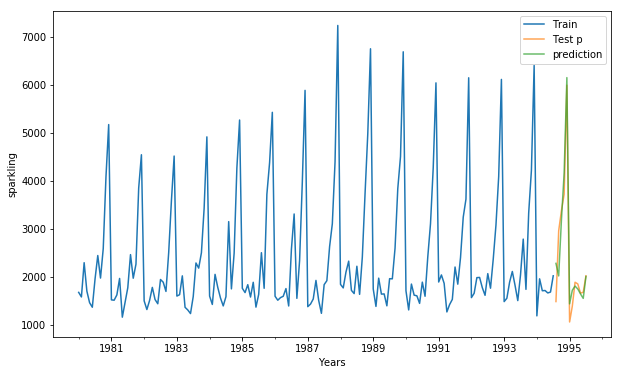

In [190]:
axis = train['Sparkling'].plot(label='Train ', figsize=(10, 6))
testCopy['Sparkling'].plot(ax=axis, label='Test p', alpha=0.7)
testCopy['pred_sparkling'].plot(ax=axis, label='prediction', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

In [191]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [192]:
n_steps = 12

fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                      columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
0,2289.871822,1706.786853,3072.154531,1706.786853,3072.154531
1,2028.651872,1512.083039,2721.694716,1512.083039,2721.694716
2,3186.392322,2375.020501,4274.950900,2375.020501,4274.950900
3,4172.482887,3110.016406,5597.916914,3110.016406,5597.916914
4,6156.691116,4588.972777,8259.984826,4588.972777,8259.984826
